<a href="https://colab.research.google.com/github/angelmorales2621-gif/Investigaci-n-de-operaciones-/blob/main/Tablero_de_colores.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

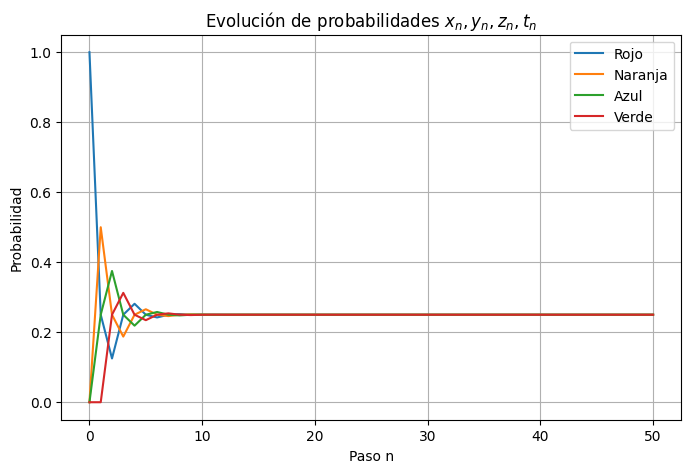

Matriz de transición P:
[[0.25 0.5  0.25 0.  ]
 [0.   0.25 0.5  0.25]
 [0.25 0.   0.25 0.5 ]
 [0.5  0.25 0.   0.25]]

Distribución estacionaria teórica:
  V       : 0.2500
  e       : 0.2500
  r       : 0.2500
  d       : 0.2500


In [10]:
import numpy as np
import matplotlib.pyplot as plt

# --- Tablero de colores ---
# Estados: 0=Rojo, 1=Naranja, 2=Azul, 3=Verde
P = np.array([
    [0.25, 0.50, 0.25, 0.00],
    [0.00, 0.25, 0.50, 0.25],
    [0.25, 0.00, 0.25, 0.50],
    [0.50, 0.25, 0.00, 0.25]
])
estados = ["Rojo", "Naranja", "Azul", "Verde"]

# --- Simulación de la distribución ---
def markov(P, pi0, steps=50):
    """pi_n"""
    pi = np.array(pi0, dtype=float)
    probabilidades = [pi.copy()]
    for _ in range(steps):
        pi = pi @ P
        probabilidades.append(pi.copy())
    return np.array(probabilidades)

# empezamos en Rojo
pi0 = [1.0, 0.0, 0.0, 0.0]
probabilidades = markov(P, pi0, steps=50)

# --- Cálculo teórico: distribución estacionaria ---
vals, vecs = np.linalg.eig(P.T)
i = np.argmin(np.abs(vals - 1))
pi_estacionario = vecs[:, i].real
pi_estacionario = pi_estacionario / pi_estacionario.sum()

# --- Gráfica ---
plt.figure(figsize=(8,5))
for i, estados in enumerate(estados):
    plt.plot(probabilidades[:, i], label=estados)
plt.title("Evolución de probabilidades $x_n, y_n, z_n, t_n$")
plt.xlabel("Paso n")
plt.ylabel("Probabilidad")
plt.legend()
plt.grid(True)
plt.show()

# --- Resultados numéricos ---
print("Matriz de transición P:")
print(P)
print("\nDistribución estacionaria teórica:")
for color, prob in zip(estados, pi_estacionario):
    print(f"  {color:8s}: {prob:.4f}")


**Todos los coloes son igualmente probables después de mucho tiempo (0.25 cada uno)**